# Exploratory data analysis

---



## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [2]:
df = pd.read_csv("Purchase_Card_Transactions.csv")
# To display the top 5 rows 
df.head(5)               

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
0,2,Department of Mental Health,2009/01/05 05:00:00+00,229.50,WW GRAINGER 912,DC,"Industrial Supplies, Not Elsewhere Classified"
1,3,District Department of Transportation,2009/01/05 05:00:00+00,3147.33,BRANCH SUPPLY,DC,"Stationery, Office & School Supply Stores"
2,4,Department of Youth Rehabilitation Services,2009/01/05 05:00:00+00,54.00,VIDEO MONITORING SRVCS,NY,Motion Pictures/Video Tape Production&Distribu...
3,5,Office of Employee Appeals,2009/01/05 05:00:00+00,137.35,STAPLES 00102186,DC,"Stationery,Office Supplies,Printing/Writing Paper"
4,6,Office of Police Complaints,2009/01/06 05:00:00+00,1340.80,FAITH MGMT CONSULTING,DC,"Stationery, Office & School Supply Stores"


In [3]:
df.tail(5)                        # To display the botton 5 rows

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
433921,433922,Unknown New Agency,2020/10/26 04:00:00+00,480.00,IN *BROADCAST ELECTRON,IL,ELECTRICAL PARTS AND EQUIPMENT
433922,433923,Unknown New Agency,2020/10/26 04:00:00+00,2112.00,IN *BROADCAST ELECTRON,IL,ELECTRICAL PARTS AND EQUIPMENT
433923,433924,Metropolitan Police Department,2020/10/26 04:00:00+00,3689.01,GLORY GLOBAL SOLUTIONS,IL,COMMERCIAL EQUIPMENT NOT ELSEWHERE CLASSIFIED
433924,433925,Unknown New Agency,2020/10/26 04:00:00+00,65.70,DEDOOSE,CA,PROFESSIONAL SERVICES-NOT ELSEWHERE CLASSIFIED
433925,433926,Department of Public Works,2020/10/26 04:00:00+00,3360.33,METROPOLITAN OFFICE PR,DC,COMPUTERS COMPUTER PERIPHERAL EQUIPMENT SOFT...




---



## 3. Checking the types of data

In [4]:
df.dtypes

OBJECTID                   int64
AGENCY                    object
TRANSACTION_DATE          object
TRANSACTION_AMOUNT       float64
VENDOR_NAME               object
VENDOR_STATE_PROVINCE     object
MCC_DESCRIPTION           object
dtype: object



---



## 4. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. 

In [5]:
df.shape

(433926, 7)

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


Now let us remove the duplicate data because it's ok to remove them.

In [7]:
df.count()      # Used to count the number of rows

OBJECTID                 433926
AGENCY                   433926
TRANSACTION_DATE         433926
TRANSACTION_AMOUNT       433926
VENDOR_NAME              433887
VENDOR_STATE_PROVINCE    432623
MCC_DESCRIPTION          433908
dtype: int64

In [8]:
df = df.drop_duplicates()
df.head(5)

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
0,2,Department of Mental Health,2009/01/05 05:00:00+00,229.50,WW GRAINGER 912,DC,"Industrial Supplies, Not Elsewhere Classified"
1,3,District Department of Transportation,2009/01/05 05:00:00+00,3147.33,BRANCH SUPPLY,DC,"Stationery, Office & School Supply Stores"
2,4,Department of Youth Rehabilitation Services,2009/01/05 05:00:00+00,54.00,VIDEO MONITORING SRVCS,NY,Motion Pictures/Video Tape Production&Distribu...
3,5,Office of Employee Appeals,2009/01/05 05:00:00+00,137.35,STAPLES 00102186,DC,"Stationery,Office Supplies,Printing/Writing Paper"
4,6,Office of Police Complaints,2009/01/06 05:00:00+00,1340.80,FAITH MGMT CONSULTING,DC,"Stationery, Office & School Supply Stores"


In [9]:
df.count()

OBJECTID                 433926
AGENCY                   433926
TRANSACTION_DATE         433926
TRANSACTION_AMOUNT       433926
VENDOR_NAME              433887
VENDOR_STATE_PROVINCE    432623
MCC_DESCRIPTION          433908
dtype: int64



---



## 7. Dropping the missing or null values.

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. 

In [10]:
print(df.isnull().sum())

OBJECTID                    0
AGENCY                      0
TRANSACTION_DATE            0
TRANSACTION_AMOUNT          0
VENDOR_NAME                39
VENDOR_STATE_PROVINCE    1303
MCC_DESCRIPTION            18
dtype: int64


In [11]:
df = df.dropna()    # Dropping the missing values.
df.count()

OBJECTID                 432623
AGENCY                   432623
TRANSACTION_DATE         432623
TRANSACTION_AMOUNT       432623
VENDOR_NAME              432623
VENDOR_STATE_PROVINCE    432623
MCC_DESCRIPTION          432623
dtype: int64

Now we have removed all the rows which contain the Null or N/A values 

In [13]:
print(df.isnull().sum())   # After dropping the values

OBJECTID                 0
AGENCY                   0
TRANSACTION_DATE         0
TRANSACTION_AMOUNT       0
VENDOR_NAME              0
VENDOR_STATE_PROVINCE    0
MCC_DESCRIPTION          0
dtype: int64




---



## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot.  The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

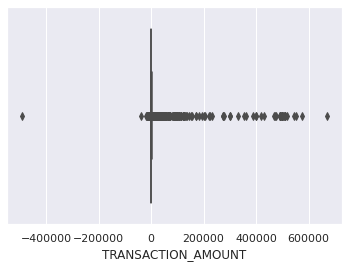

In [15]:
sns.boxplot(x=df['TRANSACTION_AMOUNT'])

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

OBJECTID              216341.0
TRANSACTION_AMOUNT       625.1
dtype: float64


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [17]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(385907, 7)



---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval.

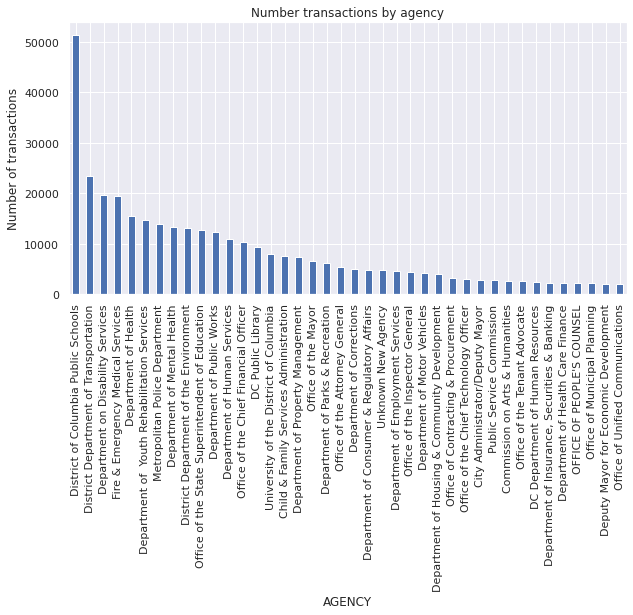

In [19]:
df.AGENCY.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number transactions by agency")
plt.ylabel('Number of transactions')
plt.xlabel('AGENCY');

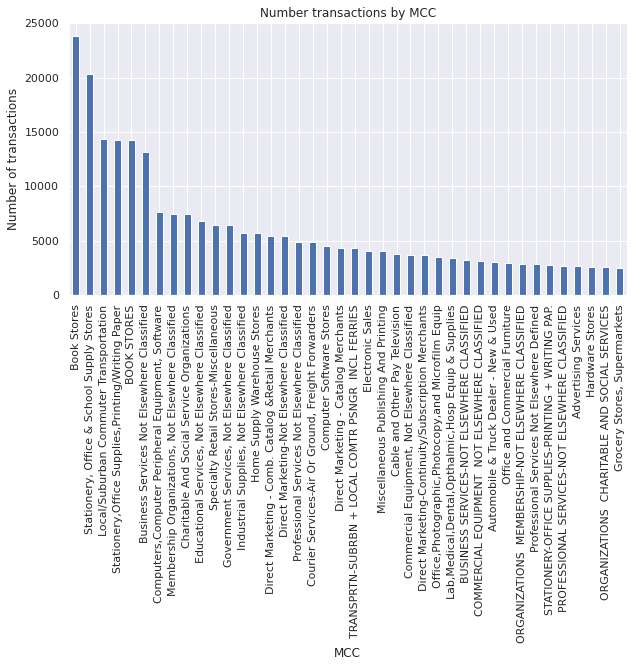

In [23]:
df.MCC_DESCRIPTION.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number transactions by MCC")
plt.ylabel('Number of transactions')
plt.xlabel('MCC');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps.

,OBJECTID,TRANSACTION_AMOUNT
OBJECTID,1.00000,-0.00868
TRANSACTION_AMOUNT,-0.00868,1.00000


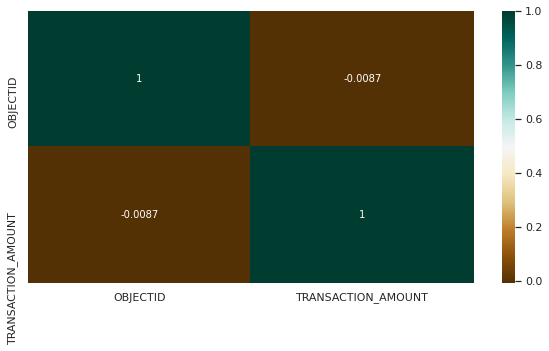

In [20]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

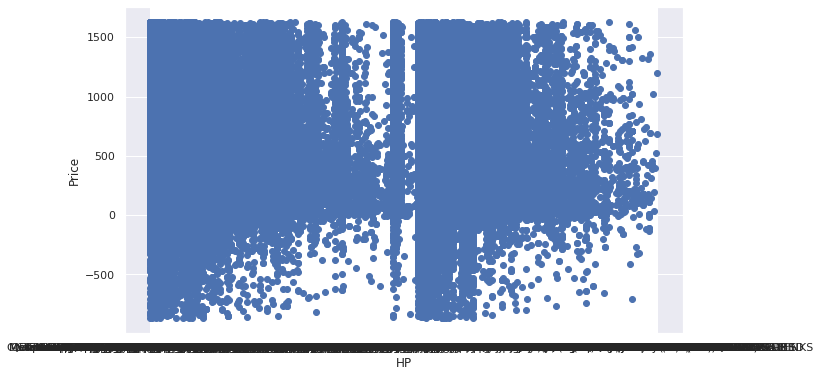

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MCC_DESCRIPTION'], df['TRANSACTION_AMOUNT'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()